## **Data Analysis of Myntra Products: Optimizing Pricing and Discount Strategies**

**Project Statement:**

Myntra wants to optimize its pricing and discount strategies to increase sales of products, enhance customer satisfaction, and maintain profitability. The challenge is to balance competitive pricing with attractive discounts across diverse product categories.

**Goals:**

- Analyze the Myntra products dataset using statistical methods.
- Analyze the distribution of product prices and ratings.
- Identify high-performing products and top sellers.
- Examine the impact of pricing and discounts on customer ratings.
- Understand relationships between various attributes such as price, rating, MRP, and discounts.
- Provide actionable recommendations for pricing and discount strategies.

**Dataset:**

Myntra Products Dataset : https://www.kaggle.com/datasets/ronakbokaria/myntra-products-dataset

In [2]:
# Importing numpy library for numerical computations
import numpy as np
# Importing pandas library for data processing
import pandas as pd

In [3]:
# Importing visualization libraries
import matplotlib.pyplot as plt  # Matplotlib for basic plotting functionality
import seaborn as sns  # Seaborn for statistical data visualization
import plotly.express as px  # Plotly Express for interactive plots

In [4]:
# Loading the Myntra Products Data into a Pandas DataFrame
raw_df = pd.read_csv('Myntra_Product_Data.csv')

# **Exploring Raw Data**

In [5]:
raw_df.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [6]:
# Displaying the shape of the raw DataFrame
raw_df.shape

(1060213, 11)

In [7]:
# Providing information about the structure and data types of the raw DataFrame
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [8]:
raw_df.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

# **Data Cleaning Process**

**Dropping unnecessary columns :**
 In the process of analysis of products data, we need the numerical data about the products and the sellers.
So there is no need of 3 columns- img (";" Separated images), asin (None), purl (Product URL on Myntra).
So we are dropping these columns from the dataframe. 

In [9]:
raw_df.drop(columns=['img', 'asin', 'purl'], inplace=True)

In [10]:
raw_df

,id,name,price,mrp,rating,ratingTotal,discount,seller
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster
...,...,...,...,...,...,...,...,...
1060208,1060209,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine
1060209,1060210,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour
1060210,1060211,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE
1060211,1060212,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster


**Check for missing values**

In [11]:
# Counting the total number of missing values in the DataFrame
missing_values = raw_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id             0
name           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
dtype: int64


**Check for duplicate entries**

In [12]:
duplicates = raw_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


# **Calculating total discount and percentage discount for each product**

**Dropping the original discount column**

In [13]:
raw_df.drop(columns=['discount'], inplace=True)

**Calculating totalDiscount and percentageDiscount values and adding news columns in the dataframe to represent them**


In [14]:
raw_df['totalDiscount'] = (raw_df['mrp'] - raw_df['price']).astype(int)

raw_df['percentageDiscount'] = ((raw_df['totalDiscount'] / raw_df['mrp']) * 100).astype(int)

In [15]:
cleaned_df = raw_df

In [16]:
cleaned_df.head()

,id,name,price,mrp,rating,ratingTotal,seller,totalDiscount,percentageDiscount
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,Difference of Opinion,767,59
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,Roadster,225,45
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,DILLINGER,648,54
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,Huetrap,803,73
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,Roadster,405,45


# **Exploratory Data Analysis**

**Univariate Statistical Analysis**

The univariate analysis is aimed at exploring the distribution of two crucial variables – product price and customer ratings. By examining descriptive statistics and visualizing the data, we gain insights into the central tendency, spread, and potential outliers. This step is important for understanding the characteristics of pricing and rating patterns, which could inform further analysis and decision-making.

**Distribution of Price**

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


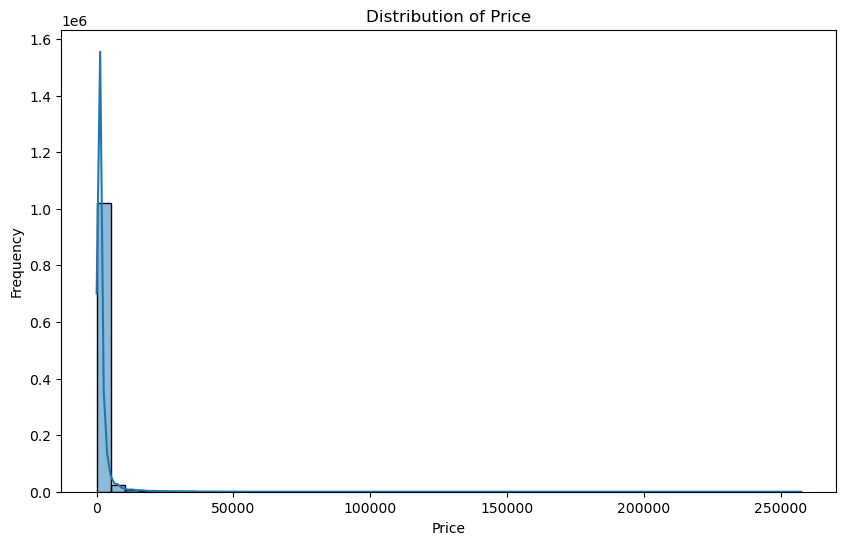

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

- the price distribution also shows the highly left skewness, because of the substantial gap between the least and most expensive products in the dataset.
- To address this skewness, a logarithmic transformation was applied to the price variable. By taking the logarithm of prices, the skewness was effectively reduced, resulting in a more normal-like distribution. 
- This transformation not only handled the skewness issue but also facilitated better interpretation and analysis of pricing patterns, as extreme values were brought closer to the central tendency, enabling more robust statistical modeling and inference.

In [25]:
np.log1p(cleaned_df['price']).describe()

count    1.060213e+06
mean     6.829711e+00
std      8.583894e-01
min      3.258097e+00
25%      6.214608e+00
50%      6.699500e+00
75%      7.311886e+00
max      1.245878e+01
Name: price, dtype: float64

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


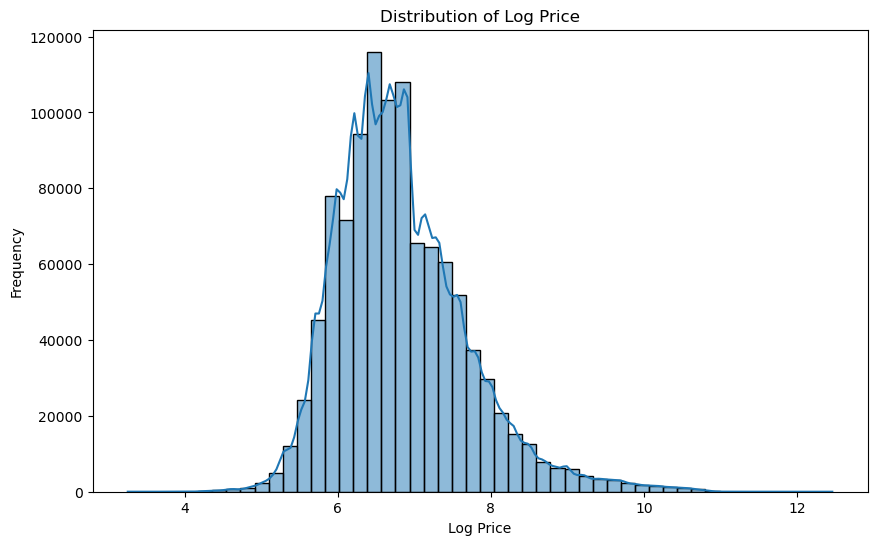

In [19]:
# Distribution of Log Price
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(cleaned_df['price']), bins=50, kde=True)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

- The distribution of logged prices shows a slight left skewness, indicating a more normal-like pattern compared to the original prices. 
- Most logged prices fell within the range of 5 to 9, with the maximum frequency occurring between 6 and 7, comprising over 11,000 products.
- The concentration of most prices between roughly INR 150 to INR 8,000 indicates that Myntra's product catalog predominantly focuses on mid-range and affordable fashion segments.
- The highest frequency of prices occurring between INR 400 to INR 1,100 suggests that this price bracket likely represents Myntra's sweet spot, catering to a large consumer base seeking reasonably priced apparel and accessories.
- The slight skewness in the logged prices could be attributed to a concentration of products in specific price ranges or potential outliers, warranting further investigation.

**Distribution of Product Ratings**

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


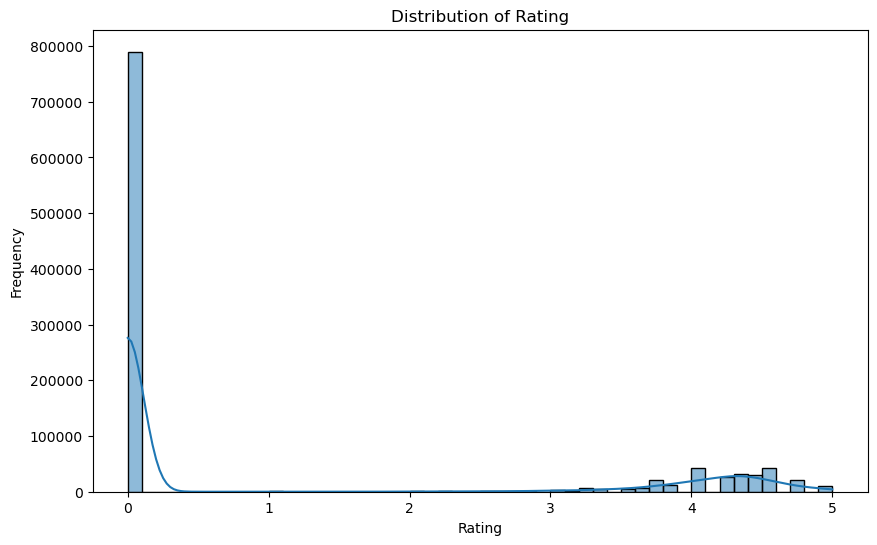

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['rating'], bins=50, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

- The univariate analysis revealed a highly left-skewed distribution for product ratings due to a large number of zero values, potentially indicating missing or null data points. 
- To obtain an accurate understanding of the rating distribution, it became necessary to filter out these zero values, which were likely placeholders for ease of analysis. 
- After removing the zero ratings, a cleaner distribution could be derived, enabling more meaningful insights into customer rating patterns.

In [23]:
# Filter out zero ratings
filtered_df = cleaned_df[cleaned_df['rating'] > 0]

In [24]:
filtered_df['rating'].describe()

count    270463.000000
mean          4.155779
std           0.507558
min           1.000000
25%           3.900000
50%           4.200000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


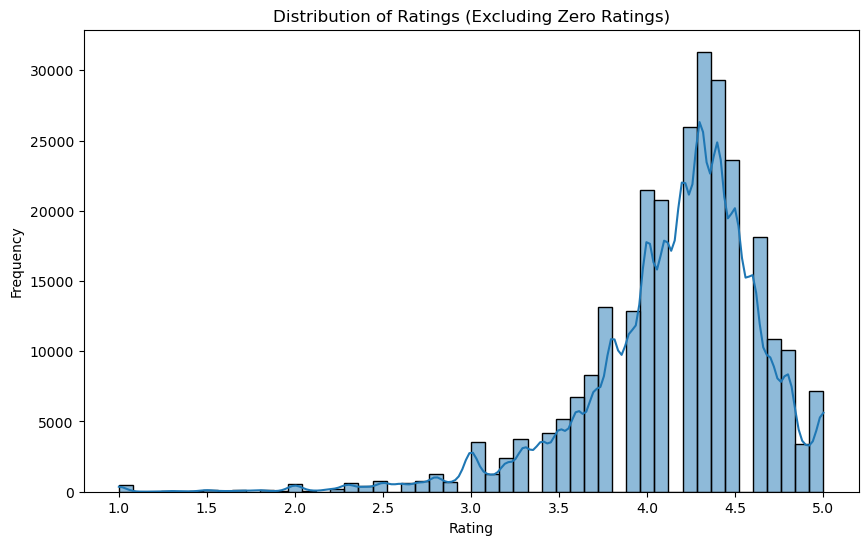

In [68]:
# Distribution of Ratings (excluding zero ratings)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['rating'], bins=50, kde=True)
plt.title('Distribution of Ratings (Excluding Zero Ratings)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

- After removing the zero ratings, the distribution showed that most ratings fell between 3.5 and 5, with the maximum frequency occurring between 4.0 and 4.5, comprising over 30,000 products. 
- This skewed distribution towards higher ratings suggests positive customer sentiment and potentially highlights top-selling or popular product categories within the Myntra catalog.

# **Multivariate Statistical Analysis**

- The multivariate analysis is conducted to understand the potential associations and interdependencies among the various product attributes. 
- This analysis aimed to investigate the relationships between variables such as price, MRP, discount amount, percentage discount offered, product ratings, and the number of ratings received. 
- By examining the correlation structures, we can get insights into how these elements interact and influence one another.

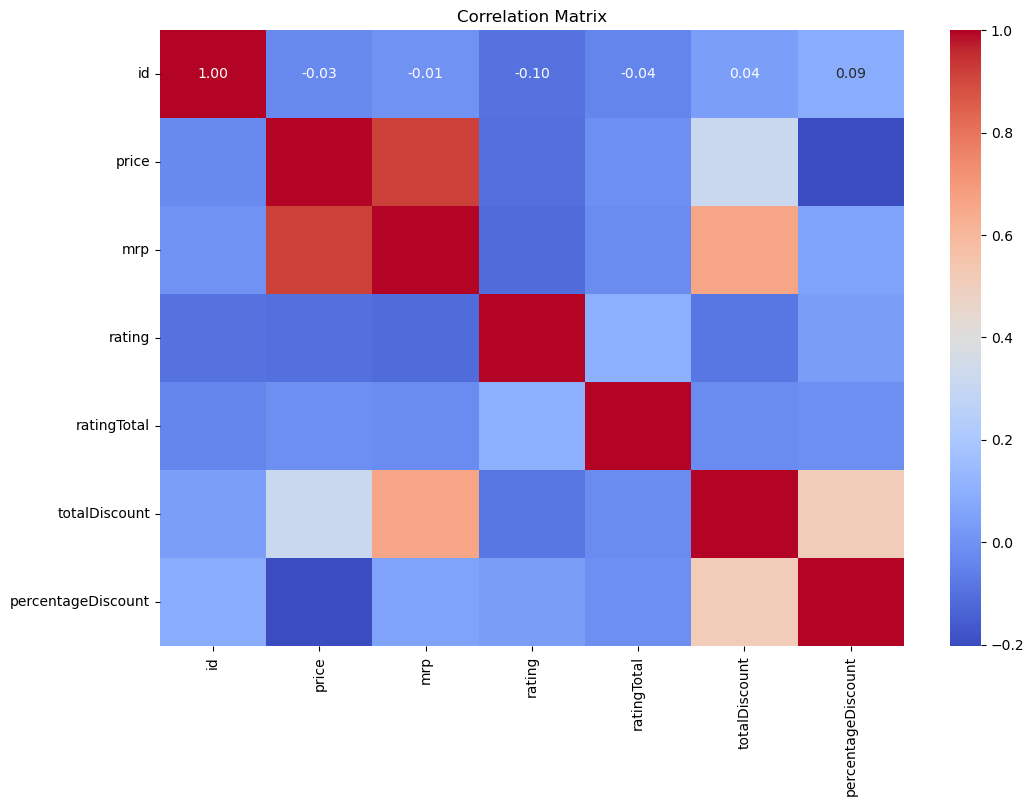

In [69]:
plt.figure(figsize=(12, 8))
corr_matrix = cleaned_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals several interesting insights into the relationships between different product attributes. While most variables exhibit low to moderate correlations, there are a few notable observations:

1. Price and MRP show a strong positive correlation, indicating that higher-priced items also tend to have higher MRPs.
2. Ratings have a weak negative correlation with price and MRP, suggesting that more expensive products may not necessarily receive higher ratings.
3. The total discount amount has a moderate positive correlation with price and MRP, implying that larger discounts are often associated with higher-priced items.
4. Percentage discounts exhibit a weak negative correlation with price, indicating that lower-priced items may offer relatively higher percentage discounts.

# **Key Analysis Points**

**1.Most Expensive and Cheapest Products** 

In [33]:
most_expensive_products = cleaned_df.sort_values(by='price', ascending=False).head(5)

most_expensive_products

,id,name,price,mrp,rating,ratingTotal,seller,totalDiscount,percentageDiscount
447028,447029,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,Versace,0,0
26184,26185,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,Versace,0,0
345950,345951,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,Versace,0,0
447791,447792,Men Stainless Steel Watch,146300.0,146300.0,0.0,0,Versace,0,0
447801,447802,Men Stainless Steel Watch,140500.0,140500.0,0.0,0,Versace,0,0


Text(0, 0.5, 'Product Name')

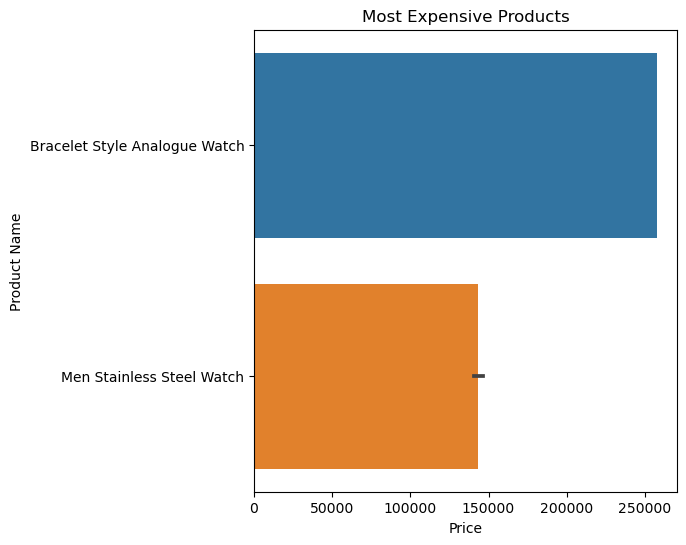

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='price', y='name', data=most_expensive_products)
plt.title('Most Expensive Products')
plt.xlabel('Price')
plt.ylabel('Product Name')

In [31]:
cheapest_products = cleaned_df.sort_values(by='price').head(5)

cheapest_products

,id,name,price,mrp,rating,ratingTotal,seller,totalDiscount,percentageDiscount
66656,66657,Hair Colour - Natural Black 1,25.0,25.0,4.3,139,Streax,0,0
222626,222627,Hair Colour - Burgundy 3.16,25.0,25.0,4.2,120,Streax,0,0
355788,355789,Hair Colour - 4 Natural Brown,25.0,25.0,3.9,14,Streax,0,0
82496,82497,Hair Colour - Dark Brown 3,25.0,25.0,4.3,65,Streax,0,0
83918,83919,Hair Colour - Natural Brown 4,25.0,25.0,4.2,79,Streax,0,0


Text(0, 0.5, 'Product Name')

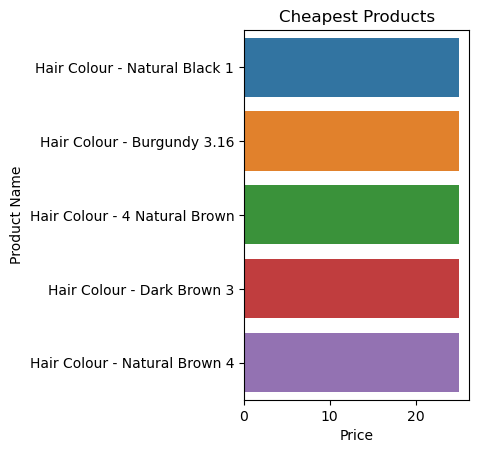

In [32]:
plt.subplot(1, 2, 2)
sns.barplot(x='price', y='name', data=cheapest_products)
plt.title('Cheapest Products')
plt.xlabel('Price')
plt.ylabel('Product Name')

- An analysis of the top 5 most expensive and bottom 5 least expensive products revealed interesting insights. 
- The priciest items were watches, while the cheapest ones were hair colors. Notably, none of these products offered any discounts, reinforcing the previous finding that discounts are primarily targeted towards mid-range offerings. 
- This highlights Myntra's strategic focus on providing attractive discounts for moderately priced products to boost sales and cater to value-conscious customers, while maintaining premium and budget categories without substantial markdowns.

**2. Top Listed Products**

In [74]:
top_listed_products = cleaned_df['name'].value_counts().head(10)

top_listed_products

name
Men Polo Collar T-shirt           5644
Gold-Plated Jewellery Set         5485
Men Typography Printed T-shirt    4326
Printed Round Neck T-shirt        4055
Men Slim Fit Jeans                4046
Men Printed T-shirt               3874
Men Pure Cotton T-shirt           3763
Women Analogue Watch              3649
Women Open Toe Flats              2940
Women Night suit                  2923
Name: count, dtype: int64

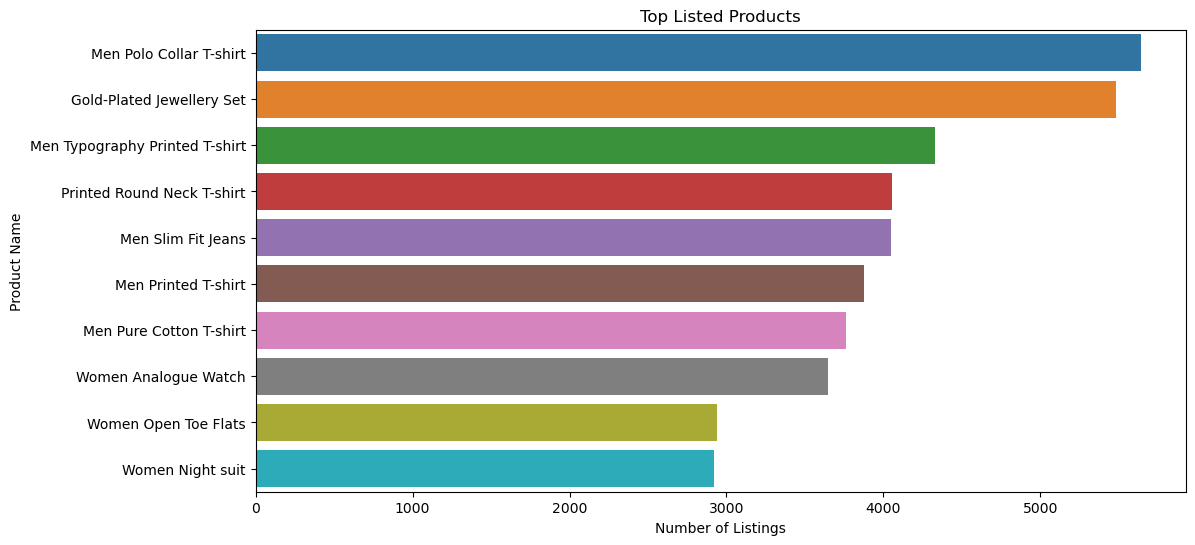

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_listed_products.values, y=top_listed_products.index)
plt.title('Top Listed Products')
plt.xlabel('Number of Listings')
plt.ylabel('Product Name')
plt.show()

**3. Top Listed Sellers**

In [76]:
top_listed_sellers = cleaned_df['seller'].value_counts().head(10)

top_listed_sellers

seller
Roadster                 10651
H&M                       6667
Puma                      6579
max                       6486
Anouk                     6158
KALINI                    5793
JC Collection             5631
HRX by Hrithik Roshan     5575
Friskers                  5240
Marks & Spencer           5113
Name: count, dtype: int64

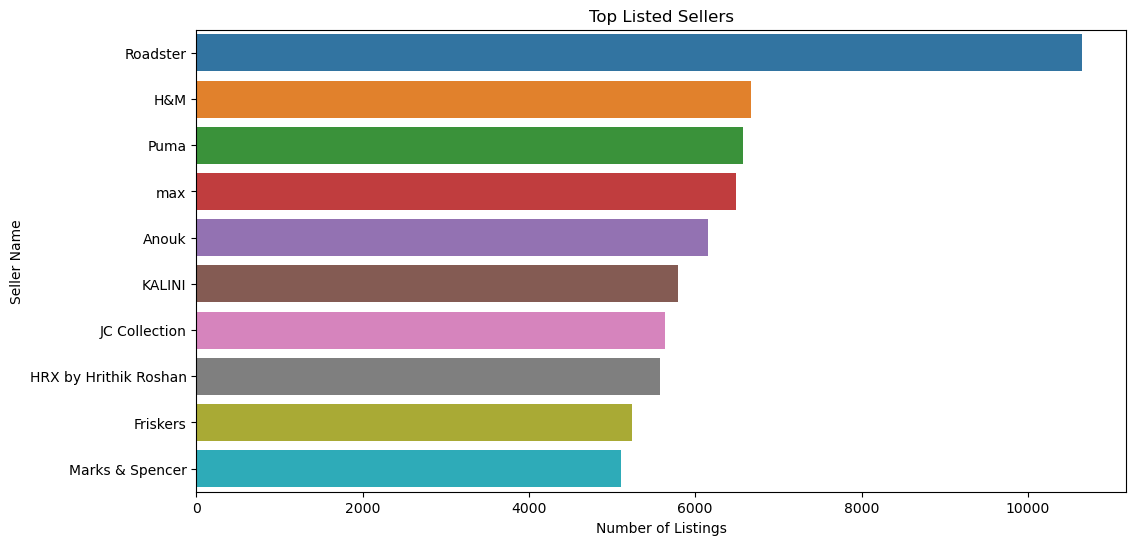

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_listed_sellers.values, y=top_listed_sellers.index)
plt.title('Top Listed Sellers')
plt.xlabel('Number of Listings')
plt.ylabel('Seller Name')
plt.show()

**4. Top Rated Products**

In [78]:
top_rated_products = filtered_df.sort_values(by=['rating', 'ratingTotal'], ascending=[False, False]).head(10)

top_rated_products

,id,name,price,mrp,rating,ratingTotal,seller,totalDiscount,percentageDiscount
180080,180081,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
245742,245743,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
376871,376872,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
379391,379392,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
126865,126866,Multigreens Face Cleanser,285.0,475.0,5.0,174,Happier,190,40
128126,128127,Multigreens Face Cleanser,285.0,475.0,5.0,174,Happier,190,40
195941,195942,Multigreens Face Cleanser,285.0,475.0,5.0,174,Happier,190,40
131946,131947,Soulfood Body Scrub 175 g,337.0,675.0,5.0,89,Happier,338,50
199389,199390,Soulfood Body Scrub 175 g,337.0,675.0,5.0,89,Happier,338,50
443599,443600,Soulfood Body Scrub 175 g,337.0,675.0,5.0,89,Happier,338,50


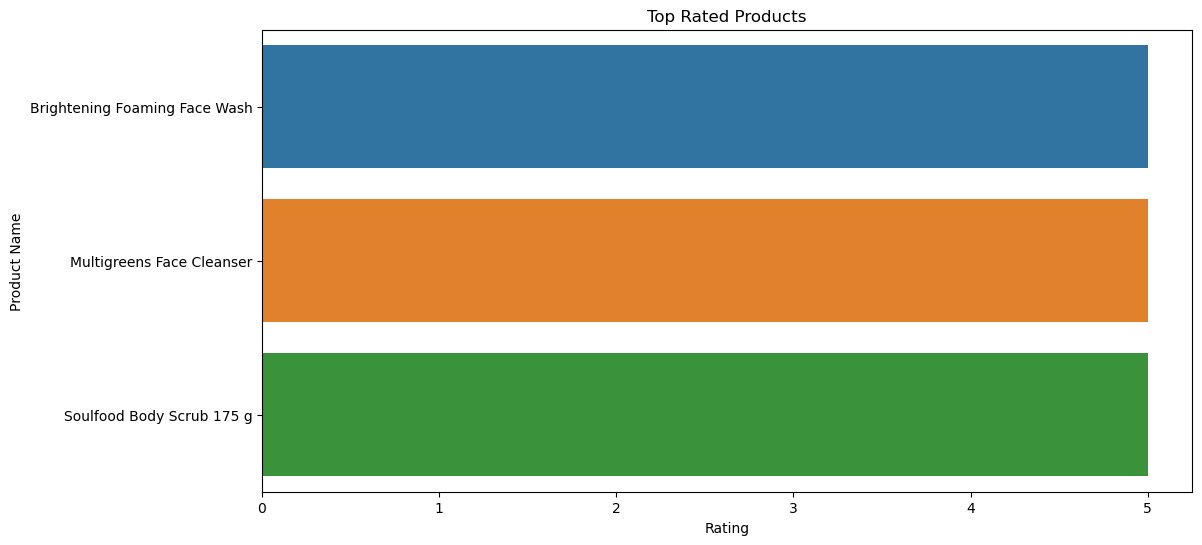

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_products)
plt.title('Top Rated Products')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.show()

 **5. Top Rated Seller**

In [80]:
top_rated_sellers = filtered_df.groupby('seller')['rating'].mean().sort_values(ascending=False).head(15)

top_rated_sellers

seller
TeenTrums                5.0
Swee Shapewear           5.0
JO                       5.0
True Blue                5.0
TULIP 21                 5.0
THE REAL WOMAN           5.0
CURIO COTTAGE            5.0
TATTVA                   5.0
LOccitane en Provence    5.0
UNCLE TONY               5.0
AFFOREST                 5.0
Splash                   5.0
OFFICE & YOU             5.0
Slosshy                  5.0
DESI WOMANIYA            5.0
Name: rating, dtype: float64

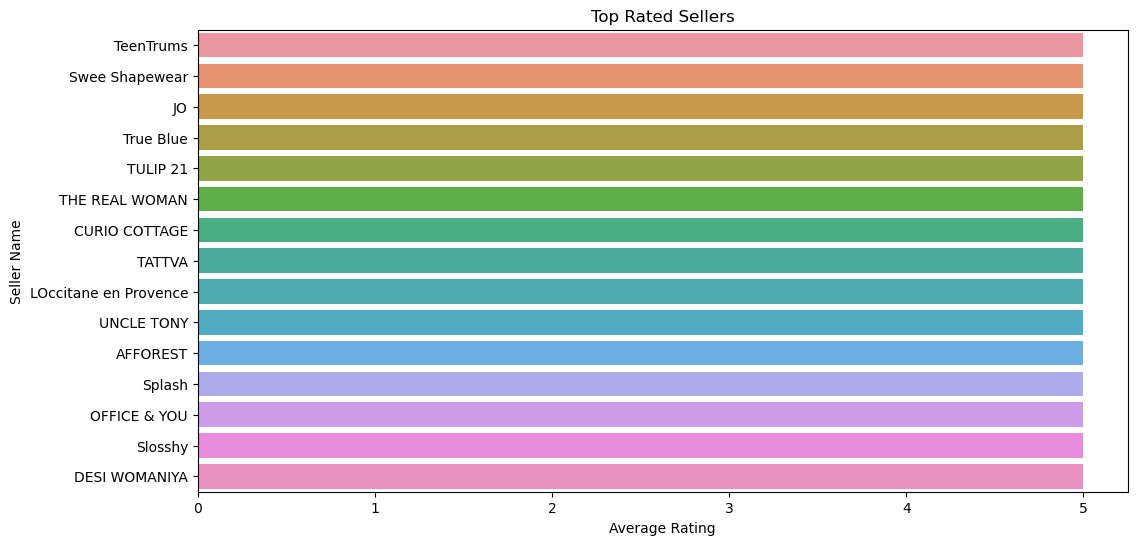

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_sellers.values, y=top_rated_sellers.index)
plt.title('Top Rated Sellers')
plt.xlabel('Average Rating')
plt.ylabel('Seller Name')
plt.show()

**6. Products with the Most Ratings**

In [82]:
most_rated_products = cleaned_df.sort_values(by='ratingTotal', ascending=False).head(10)

most_rated_products

,id,name,price,mrp,rating,ratingTotal,seller,totalDiscount,percentageDiscount
271611,271612,Toner-Lotion-Cream-Lip Balm,695.0,1070.0,4.4,76400,Biotique,375,35
375328,375329,Toner-Lotion-Cream-Lip Balm,695.0,1070.0,4.4,76400,Biotique,375,35
950168,950169,Men Pack of 2 Printed T-shirt,1398.0,1398.0,4.2,75100,HRX by Hrithik Roshan,0,0
254775,254776,Unisex Skin Care Gift Set,598.0,920.0,4.4,72700,Biotique,322,35
353233,353234,Unisex Skin Care Gift Set,598.0,920.0,4.4,72700,Biotique,322,35
989446,989447,Pack Of 2 Printed T-shirts,1598.0,1598.0,4.2,72600,HRX by Hrithik Roshan,0,0
950167,950168,Pack Of 2 Printed T-shirts,1598.0,1598.0,4.2,72600,HRX by Hrithik Roshan,0,0
990061,990062,Pack Of 2 Printed Pure Cotton T-shirt,1398.0,1398.0,4.2,72500,HRX by Hrithik Roshan,0,0
88090,88091,Toner-Sunscreen-Lotion-Cream,719.0,1090.0,4.4,72400,Biotique,371,34
232773,232774,Sustainable Skin & Hair Care,926.0,1495.0,4.4,71300,Biotique,569,38


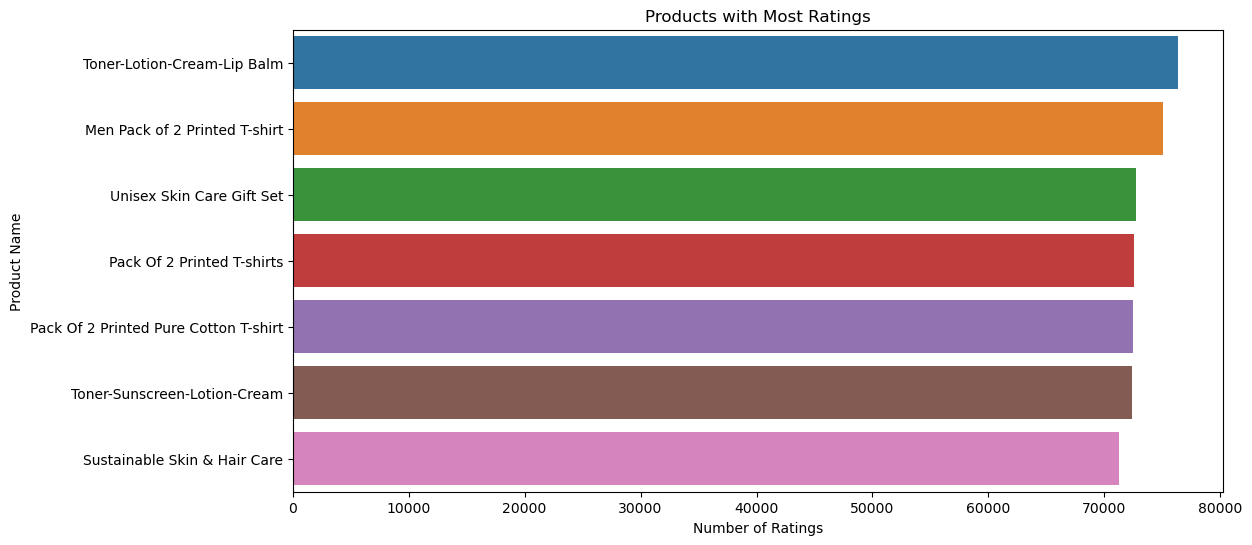

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ratingTotal', y='name', data=most_rated_products)
plt.title('Products with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Name')
plt.show()

**7. Sellers with the Most Ratings**

In [84]:
most_rated_sellers = cleaned_df.groupby('seller')['ratingTotal'].sum().sort_values(ascending=False).head(10)

most_rated_sellers

seller
Biotique                 6024258
Roadster                 4447191
MCaffeine                2499383
HRX by Hrithik Roshan    2372765
Maybelline               1673114
Mamaearth                1611773
Plum                     1118855
HIGHLANDER                784365
HERE&NOW                  745192
Neutrogena                687538
Name: ratingTotal, dtype: int64

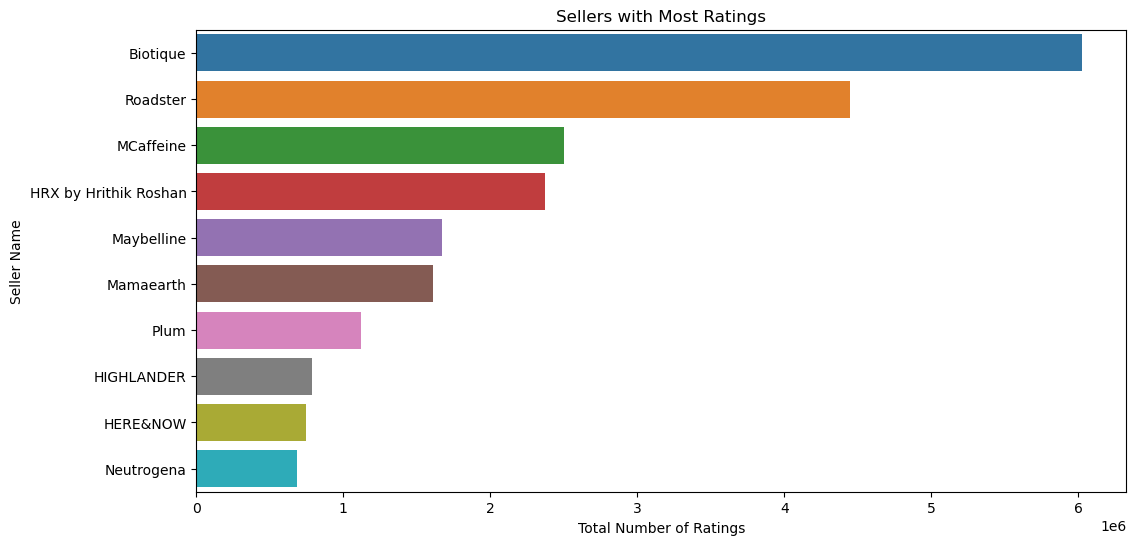

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_rated_sellers.values, y=most_rated_sellers.index)
plt.title('Sellers with Most Ratings')
plt.xlabel('Total Number of Ratings')
plt.ylabel('Seller Name')
plt.show()

# **Discount Analysis of Products**

**Highest Total Discount**

In [86]:
highest_total_discount = cleaned_df.sort_values(by='totalDiscount', ascending=False).head(10)

highest_total_discount

,id,name,price,mrp,rating,ratingTotal,seller,totalDiscount,percentageDiscount
617488,617489,Ready to Wear Lehenga Blouse With Dupatta,36629.0,98999.0,0.0,0,Phenav,62370,63
636013,636014,Ready to Wear Lehenga Blouse With Dupatta,34199.0,94999.0,0.0,0,Phenav,60800,64
120621,120622,Semi-Stitched Lehenga Unstitched Blouse With D...,49499.0,109999.0,0.0,0,Inddus,60500,55
203408,203409,Semi-Stitched Lehenga Set,49499.0,109999.0,0.0,0,Inddus,60500,55
982816,982817,Semi-Stitched Lehenga Unstitched Blouse With D...,38752.0,96881.0,0.0,0,ODETTE,58129,60
156141,156142,Semi-Stitched Lehenga Set,40849.0,94999.0,0.0,0,Inddus,54150,57
164299,164300,Semi-Stitched Lehenga Unstitched Blouse With D...,40849.0,94999.0,0.0,0,Inddus,54150,57
619268,619269,Ready to Wear Lehenga Set,34439.0,81999.0,0.0,0,Phenav,47560,58
208928,208929,Semi-Stitched Lehenga Set,38699.0,85999.0,0.0,0,Inddus,47300,55
117893,117894,Semi-Stitched Lehenga Set,38699.0,85999.0,0.0,0,Inddus,47300,55


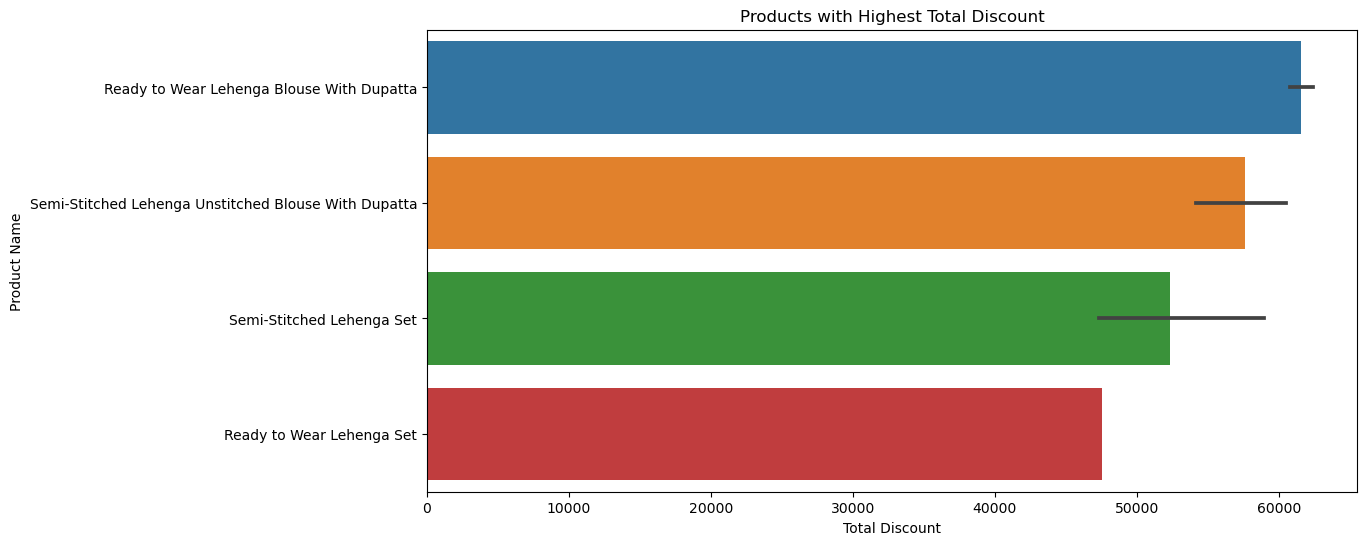

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(x='totalDiscount', y='name', data=highest_total_discount)
plt.title('Products with Highest Total Discount')
plt.xlabel('Total Discount')
plt.ylabel('Product Name')
plt.show()

**Highest Percentage Discount**

In [88]:
highest_percentage_discount = cleaned_df.sort_values(by='percentageDiscount', ascending=False).head(10)

highest_percentage_discount

,id,name,price,mrp,rating,ratingTotal,seller,totalDiscount,percentageDiscount
714620,714621,Gold-Plated Jewellery Set,570.0,5700.0,0.0,0,Kord Store,5130,90
924332,924333,Silk Cotton Saree,499.0,4999.0,0.0,0,KALINI,4500,90
923949,923950,Ilkal Pure Georgette Saree,499.0,4999.0,3.8,8,KALINI,4500,90
223609,223610,Set Of 15 Gold-Plated Contemporary Stackable ...,249.0,2495.0,4.0,24,AMI,2246,90
223611,223612,Women Gold-Plated Chain Set,249.0,2495.0,4.9,7,AMI,2246,90
134036,134037,Layered Chain Necklace,299.0,2995.0,4.3,28,Kord Store,2696,90
632336,632337,Floral Banarasi Art Silk Saree,680.0,6800.0,0.0,0,Silk Land,6120,90
319115,319116,Women Brass Cubic Zirconia Silver-Plated Bangl...,175.0,1750.0,3.9,19,AMI,1575,90
631237,631238,Gold-Plated Jewellery Set,417.0,4171.0,0.0,0,Kord Store,3754,90
224711,224712,Gold Plated Kamarbandh,411.0,4112.0,0.0,0,Kord Store,3701,90


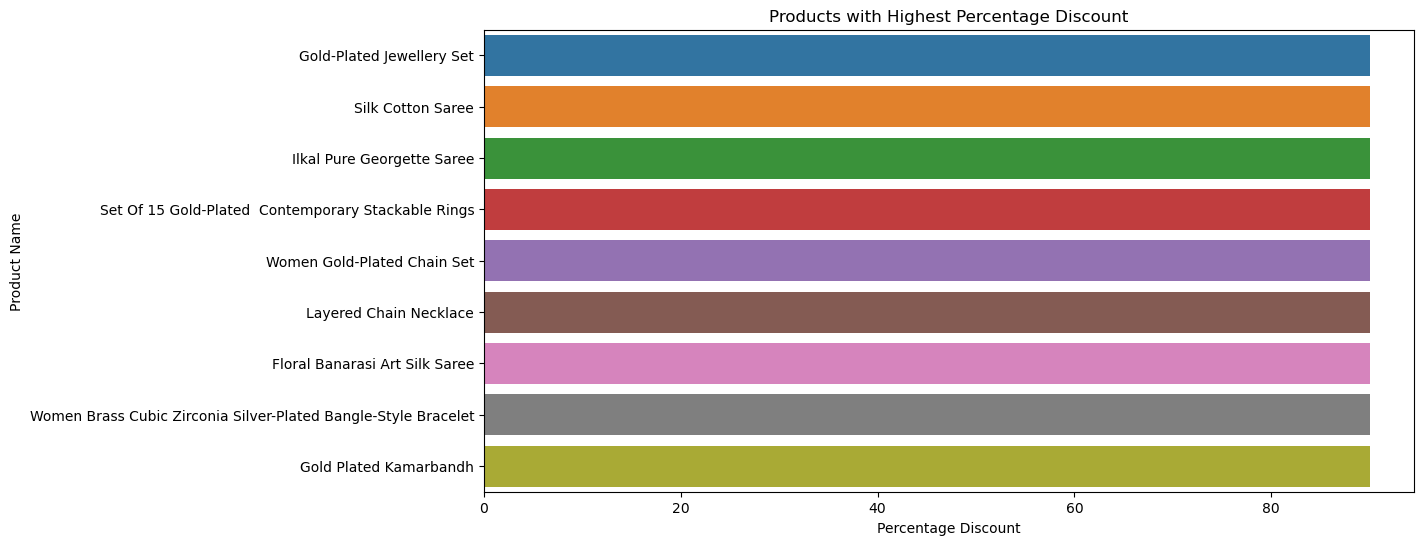

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x='percentageDiscount', y='name', data=highest_percentage_discount)
plt.title('Products with Highest Percentage Discount')
plt.xlabel('Percentage Discount')
plt.ylabel('Product Name')
plt.show()

**Sellers Offering High Discounts**

In [90]:
sellers_with_high_discounts = cleaned_df.groupby('seller')['percentageDiscount'].mean().sort_values(ascending=False).head(10)

sellers_with_high_discounts

seller
Kord Store       88.734417
CLEMIRA          87.000000
Little Kiki      87.000000
TRENDY RABBIT    86.987952
WM               86.640351
White World      86.608247
Silk Land        85.968127
OOMPH            84.469076
aadita           84.189220
QTO              84.100000
Name: percentageDiscount, dtype: float64

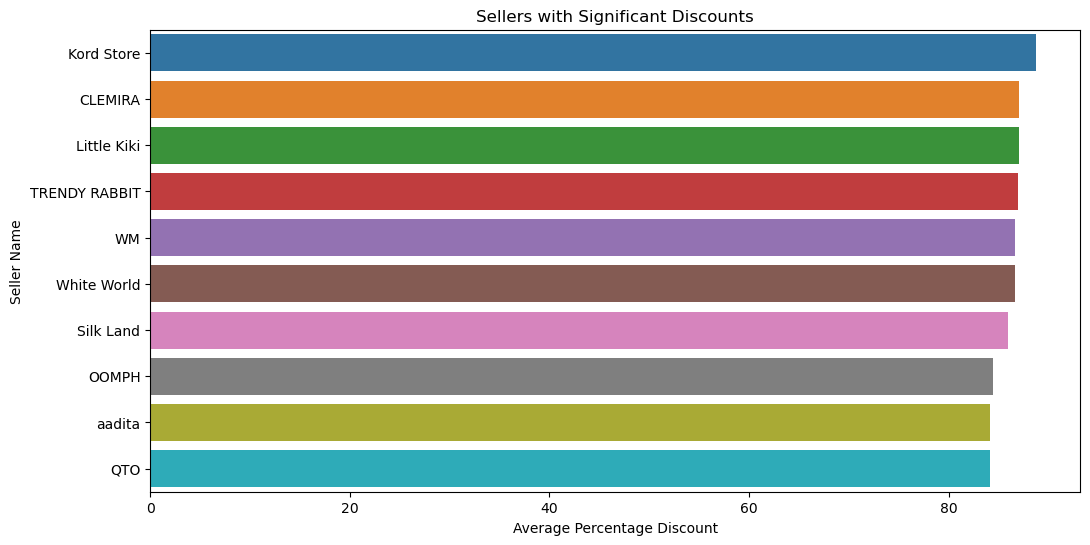

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x=sellers_with_high_discounts.values, y=sellers_with_high_discounts.index)
plt.title('Sellers with Significant Discounts')
plt.xlabel('Average Percentage Discount')
plt.ylabel('Seller Name')
plt.show()

# **Relationship Analysis between Attributes**

**MRP Vs Rating**

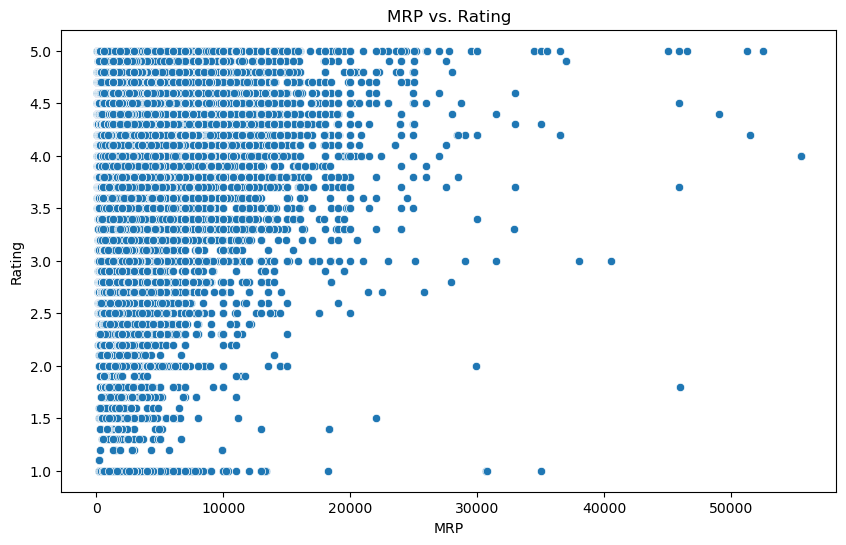

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mrp', y='rating', data=filtered_df)
plt.title('MRP vs. Rating')
plt.xlabel('MRP')
plt.ylabel('Rating')
plt.show()


- The scatter graph illustrates a concentration of product ratings between 3 to 5 and MRPs between 0 to 20000, indicating a sweet spot in pricing where customers are satisfied. 
- This suggests that Myntra's products within this range resonate well with their target audience, offering good value for money. 
- Understanding this zone can help Myntra refine its pricing and product strategies to better meet customer preferences and maintain competitiveness in the market.

**MRP Vs Total Number of Ratings**

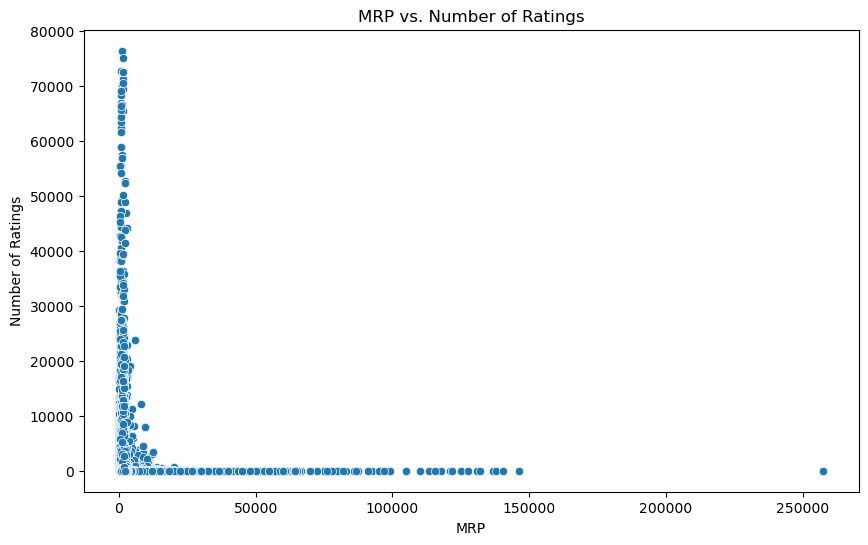

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mrp', y='ratingTotal', data=cleaned_df)
plt.title('MRP vs. Number of Ratings')
plt.xlabel('MRP')
plt.ylabel('Number of Ratings')
plt.show()

- The relationship between MRP and total ratings reveals a notable pattern, with a majority of ratings clustered between 0 to 20000 MRP, followed by a sharp decline beyond this range. 
- This suggests that products within the lower to mid-price range attract more purchases and subsequent ratings, possibly due to their broader appeal and affordability. 
- Higher-priced items beyond 20000 MRP may cater to a niche market with fewer purchases and thus fewer ratings.

**Price Vs MRP**

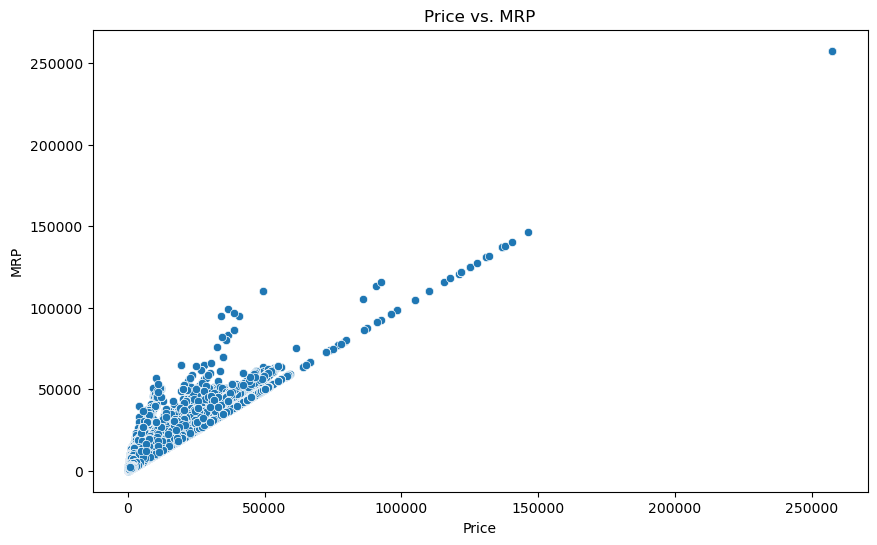

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='mrp', data=cleaned_df)
plt.title('Price vs. MRP')
plt.xlabel('Price')
plt.ylabel('MRP')
plt.show()

- clustering of points around the inclined line indicates that, in general, the price of products on Myntra correlates closely with their Maximum Retail Price. 
- This alignment suggests that Myntra's pricing strategy is consistent with the manufacturer's suggested prices, reflecting transparency and reliability for customers.

**MRP Vs Total Discount Amount**

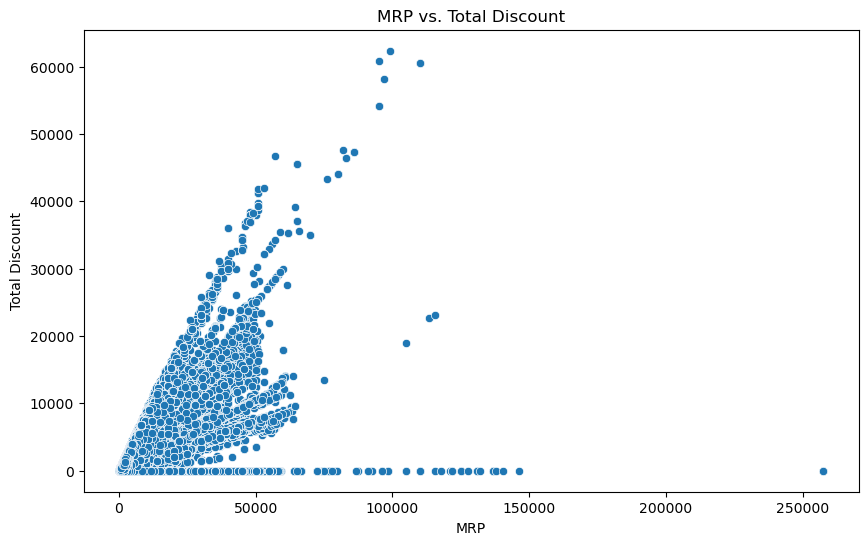

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mrp', y='totalDiscount', data=cleaned_df)
plt.title('MRP vs. Total Discount')
plt.xlabel('MRP')
plt.ylabel('Total Discount')
plt.show()

- There's a positive correlation between MRP and Total Discount, indicating higher-priced products get larger absolute discounts. 
- Most products cluster at the lower end of the MRP range, highlighting a focus on affordable and mid-range items. 
- For lower MRP values, discounts vary widely, possibly due to factors like category, seasonality, or inventory clearance. In contrast, higher MRP values show a consistent discount pattern, suggesting a percentage-based approach.

**MRP Vs Percentage Discount**

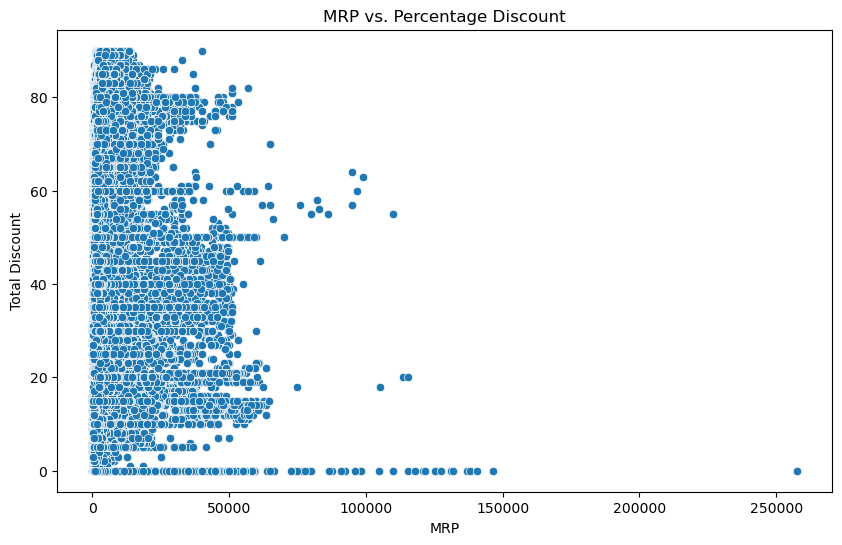

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mrp', y='percentageDiscount', data=cleaned_df)
plt.title('MRP vs. Percentage Discount')
plt.xlabel('MRP')
plt.ylabel('Total Discount')
plt.show()

- Lower MRP products exhibit a wide range of percentage discounts, from minimal to substantial. 
- As MRP increases, percentage discounts cluster around lower values, indicating conservative discounting for higher-priced items. 
- Most products are in the lower MRP range, targeting value-conscious consumers with competitive discounts. 
- This suggests Myntra strategically employs aggressive discounts for budget and mid-range products to attract price-sensitive customers, while maintaining controlled discounts for premium items to preserve margins and brand perception

In [97]:
# Exorting cleaned_df for making dashboard in PowerBI
cleaned_df.to_csv("cleaned_df.csv", index=False)

# **Conclusions :**

The project aimed to perform Exploratory Data Analysis (EDA) of Myntra products to derive meaningful insights and visualize them effectively. This included statistical analysis, key analysis points, discount analysis, and relationship analysis between different product attributes. The conclusions from these analyses are as follows:

**Analysis and Insights:**

- **Price Distribution**: Most products are priced between INR 150 to INR 8,000, with a concentration in the INR 400 to INR 1,100 range.
- **Rating Distribution**: Most products have ratings between 3.5 and 5, indicating overall positive customer sentiment.
- **Discount Patterns**: Higher-priced products receive larger absolute discounts, but percentage discounts are more variable for lower-priced items.

**Key Findings:**

- **Mid-Range Focus**: Myntra's product catalogue is predominantly mid-range, appealing to value-conscious customers.
- **High Ratings for Mid-Range Products**: Products below INR 20,000 receive higher ratings, suggesting good value perception.
- **Discount Strategy**: A consistent percentage-based discount policy for higher-priced items and variable discounts for lower-priced products.

**Recommendations:**

- **Optimize Mid-Range Pricing**: Maintain competitive pricing and attractive discounts for mid-range products to boost sales and customer satisfaction.
- **Controlled Premium Discounts**: Apply a consistent, conservative discount strategy for premium products to maintain brand perception and profitability.
- **Dynamic Discounting**: Implement dynamic discounting strategies for budget-friendly products based on seasonality and inventory levels.

This analysis highlights Myntra's strategic approach to pricing and discounts, catering to a wide range of customers with attractive discounts on mid-range products, while maintaining a premium segment with more controlled discounting practices.

By leveraging these insights, Myntra can refine its pricing and promotional strategies to optimize revenue, profitability, and customer satisfaction. The strategic focus on mid-range products with competitive discounts can attract and retain value-conscious shoppers while preserving the premium segment.